In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd



In [2]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

2023-02-20 09:12:59.781971: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


# 讀入 MNSIT 數據集

In [3]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
len(x_train)

60000

In [5]:
len(x_test)


10000

In [6]:
x_train = x_train.reshape(60000, 784)/255
x_test = x_test.reshape(10000, 784)/255
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

### 建構自己的神經網路

In [7]:
# model 是名稱，Sequential 是建構方法
model = Sequential()

2023-02-20 09:13:24.130247: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [8]:
# model 中加入（神經網路模式CNN/RNN/DNN（神經元數量,維度（這邊是28*28）,激發函數））
model.add(Dense(100, input_dim=784, activation='relu'))

In [9]:
# 第二層
model.add(Dense(100, activation='relu'))

In [10]:
# 輸出層
# 10 代表說最後輸出10個神經元（因為數字10種 1~10）
model.add(Dense(10, activation='softmax'))

In [11]:
# loss 的意思是 loss function, SGD(gradient descent) 
model.compile(loss='mse', optimizer=SGD(learning_rate=1), 
              metrics=['accuracy'])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 89,610
Trainable params: 89,610
Non-trainable params: 0
_________________________________________________________________


### Training

In [13]:
# batch size 分批的概念
# epochs 學習幾次的意思
model.fit(x_train, y_train, batch_size=100, epochs=50)

Epoch 1/50
600/600 [==============================] - 7s 7ms/step - loss: 0.0273 - accuracy: 0.8200
Epoch 2/50
600/600 [==============================] - 4s 7ms/step - loss: 0.0117 - accuracy: 0.9244
Epoch 3/50
600/600 [==============================] - 4s 7ms/step - loss: 0.0095 - accuracy: 0.9399
Epoch 4/50
600/600 [==============================] - 4s 7ms/step - loss: 0.0081 - accuracy: 0.9488
Epoch 5/50
600/600 [==============================] - 4s 7ms/step - loss: 0.0071 - accuracy: 0.9555
Epoch 6/50
600/600 [==============================] - 4s 7ms/step - loss: 0.0064 - accuracy: 0.9600
Epoch 7/50
600/600 [==============================] - 4s 7ms/step - loss: 0.0057 - accuracy: 0.9647
Epoch 8/50
600/600 [==============================] - 4s 7ms/step - loss: 0.0052 - accuracy: 0.9683
Epoch 9/50
600/600 [==============================] - 5s 8ms/step - loss: 0.0048 - accuracy: 0.9714
Epoch 10/50
600/600 [==============================] - 4s 7ms/step - loss: 0.0044 - accuracy: 0.9741

In [14]:
y_predict = np.argmax(model.predict(x_test), axis=-1)

313/313 [==============================] - 2s 5ms/step


神經網路預測是: 4


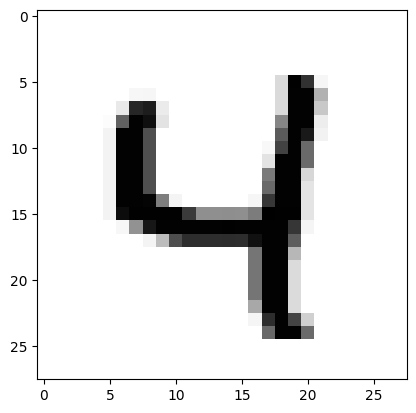

In [15]:
n = 9453
print('神經網路預測是:', y_predict[n])
plt.imshow(x_test[n].reshape(28,28), cmap='Greys')